In [32]:
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [85]:
class Gene_transform:
    """Transform genes into Voss, z-curve, tetrahedron.
        Input for functions is string of {a, t, g, c} in lower case."""
    
    def __init__(self):
        self.NOT_GENE_CODE = re.compile(r'[^acgt]')
    
    def check_is_gene(self, genes):
        assert type(genes) is str
        return not bool(self.NOT_GENE_CODE.search(genes))
    
    """for string of lenght N returns array of shape (4, N)"""
    
    def voss(self, genes):
        assert type(genes) is str
        x = np.array(list(genes))
        u_a = (x == 'A').astype(int)
        u_t = (x == 'C').astype(int)
        u_g = (x == 'G').astype(int)
        u_c = (x == 'T').astype(int)
        return np.array([u_a, u_t, u_g, u_c])

    """is voss - flag for precomputed voss; if true => genes is voss array else genes is string;
       for string of lenght N returns array of shape (3, N)"""
    
    def z_curve(self, genes, is_voss=False, i = 1):
        if(not is_voss):
            voss = self.voss(genes)
        else:
            voss = genes
        assert type(voss) is np.ndarray
        assert voss.shape[0] == 4

        x_r = voss[0] - voss[1] + voss[2] - voss[3]
        x_g = voss[0] + voss[1] - voss[2] - voss[3]
        x_b = voss[0] - voss[1] - voss[2] + voss[3]
        
        res = np.array([x_r, x_g, x_b])  
        res.tofile("obs/" + str(i) + ".txt",",","%s") #export for txt
        
        return res
    
    def tetrahedron(self, genes, is_voss=False):
        if(not is_voss):
            voss = self.voss(genes)
        else:
            voss = genes
        assert type(voss) is np.ndarray
        assert voss.shape[0] == 4

        x_r = 2.0**0.5/3.0 * (2.0 * voss[3] - voss[1] - voss[2])
        x_g = 6.0**0.5/3.0 * (voss[1] - voss[2])
        x_b = 1.0/3.0 * (3.0 * voss[0] - voss[1] - voss[2] - voss[3])
        return np.array([x_r, x_g, x_b])  
    
    def z_curve_to_img(self, z):
        assert type(z) is np.ndarray
        assert z.shape[0] == 3
        image = z.T
        height = int(image.shape[0]**0.5)
        image = image[:height**2].reshape(height, height, 3)
        image = ((image + 1) * 255/2).astype("uint8")
        return image

    def tetrahedron_to_img(self, z):
        return self.z_curve_to_img(z)

In [86]:
class Gene_transform_arr:
    """Transform array of genes into Voss, z-curve, tetrahedron.
        Input for functions is array of strings of {a, t, g, c} in lower case."""
    
    def __init__(self):
        self.NOT_GENE_CODE = re.compile(r'[^acgt]')
    
    def check_is_gene(self, genes):
        assert type(genes) is np.ndarray
        for string in genes:
            if(bool(self.NOT_GENE_CODE.search(string))):
                return False
        return True
    
    """for array of strings of shape (M, N) returns array of shape (4, M, N)"""
    
    def voss(self, genes):
        assert type(genes) is np.ndarray
        f = lambda x: list(x)
        x = np.array(map(f, genes))    
        u_a = (x == 'a' or x == 'A').astype(int)
        u_t = (x == 'c' or x == 'C').astype(int)
        u_g = (x == 'g' or x == 'G').astype(int)
        u_c = (x == 't' or x == 'T').astype(int)
        return np.array([u_a, u_t, u_g, u_c])

    """is voss - flag for precomputed voss; if true => genes is voss array else genes is string;
       for array of strings of shape (M, N) returns array of shape (3, M, N)"""
    
    def z_curve(self, genes, is_voss=False):
        if(not is_voss):
            voss = self.voss(genes)
        else:
            voss = genes
        assert type(voss) is np.ndarray
        assert voss.shape[0] == 4

        x_r = voss[0] - voss[1] + voss[2] - voss[3]
        x_g = voss[0] + voss[1] - voss[2] - voss[3]
        x_b = voss[0] - voss[1] - voss[2] + voss[3]
        return np.array([x_r, x_g, x_b])
    
    def tetrahedron(self, genes, is_voss=False):
        if(not is_voss):
            voss = self.voss(genes)
        else:
            voss = genes
        assert type(voss) is np.ndarray
        assert voss.shape[0] == 4

        x_r = 2.0**0.5/3.0 * (2.0 * voss[3] - voss[1] - voss[2])
        x_g = 6.0**0.5/3.0 * (voss[1] - voss[2])
        x_b = 1.0/3.0 * (3.0 * voss[0] - voss[1] - voss[2] - voss[3])
        return np.array([x_r, x_g, x_b])
    
    
    def z_curve_to_img(self, z):
        assert type(z) is np.ndarray
        assert z.shape[0] == 3
        Image_list = np.split(z, z.shape[1], axis=1).reshape((z.shape[0], z.shape[2]))
        for image in Image_list:
            image = image.T
            height = int(image.shape[0]**0.5)
            image = image[:height**2].reshape(height, height, 3)
            image = ((image + 1) * 255/2).astype("uint8")
        return Image_list

    def tetrahedron_to_img(self, z):
        return z_curve_to_img(z)   

In [87]:
lenght = 1000000
genes = ""
for _ in xrange(lenght):
    seed = random.randint(1, 4)
    if(seed == 1):
        genes += "A"
    elif(seed == 2):
        genes += "T"
    elif(seed == 3):
        genes += "G"
    else:
        genes += "C"

In [88]:
print len(genes)
print genes[:5]
print genes[200:240]

1000000
CAATT
ATAGTGCTATGCACGTAACTGGATGCTATGCGCCATAGAA


In [89]:
transformer = Gene_transform()
print transformer.check_is_gene(genes)

False


In [90]:
%%timeit
voss = transformer.voss(genes)

10 loops, best of 3: 121 ms per loop


In [93]:
voss = transformer.voss(genes)
z_curve = transformer.z_curve(voss, is_voss=True)
tetrahedron = transformer.tetrahedron(voss, is_voss=True)

In [94]:
print z_curve

[[-1  1  1 ...,  1  1 -1]
 [ 1  1  1 ...,  1  1 -1]
 [-1  1  1 ...,  1  1  1]]


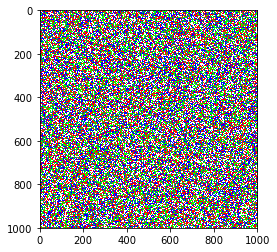

In [95]:
img = transformer.z_curve_to_img(z_curve)
plt.imshow(img)

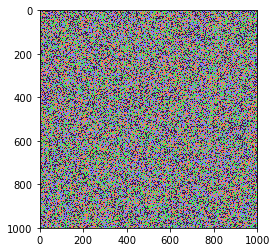

In [96]:
img = transformer.tetrahedron_to_img(tetrahedron)
plt.imshow(img)